In [1]:
from datetime import timedelta
import numpy as np
import parcels

fieldset = parcels.FieldSet.from_data(
    {"U": 0, "V": 0}, {"lon": 0, "lat": 0}
)

kh_zonal = 100  # in m^2/s
kh_meridional = 200  # in m^2/s


# Create field of constant Kh_zonal and Kh_meridional

fieldset.add_field(parcels.Field("Kh_zonal", kh_zonal, lon=0, lat=0))
fieldset.add_field(parcels.Field("Kh_meridional", kh_meridional, lon=0, lat=0))


# Set random seed
parcels.ParcelsRandom.seed(123456)

runtime = timedelta(days=365)
npart = 10_000

pset = parcels.ParticleSet(
    fieldset=fieldset, pclass=parcels.JITParticle, lon=np.zeros(npart), lat=np.zeros(npart)
)

pset.execute(
    pset.Kernel(parcels.DiffusionUniformKh), runtime=runtime, dt=timedelta(hours=1)
)

INFO: Compiled ParcelsRandom ==> /tmp/parcels-200835/parcels_random_27da3f19-ac4e-4925-8f2d-f6ca5d3f5c03.c
100%|██████████| 31536000.0/31536000.0 [00:18<00:00, 1679760.86it/s]


In [2]:
from matplotlib import pyplot as plt
import numpy as np

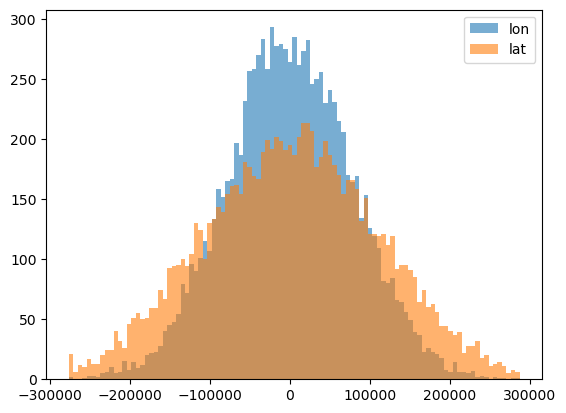

In [3]:
_, bins, _ = plt.hist(pset.lon, bins=101, alpha=0.6, label="lon")
plt.hist(pset.lat, bins=bins, alpha=0.6, label="lat");
plt.legend();